In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

# Vectors

This notebook uses many images from the excellent [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/) from [Jay Alammar](https://jalammar.github.io/).

## Axes

Axes == dimension

i.e. three axes == three dimensions

## Scalars, vectors, matricies and tensors

See Chapter 2 of [Deep Learning](https://www.deeplearningbook.org/).

Being specific about how we use these terms (there is no solid concensus - many people (including me) will use array and/or tensor).

### Scalar

$\textit{x}$

- single number
- lowercase, italic $\textit{x}$
- point

### Vector

$\textbf{x} = \begin{bmatrix}x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold 
- $x_{1}$ = first element
- line

### Matrix

$\textbf{A}_{2, 2} = \begin{bmatrix}A_{1, 1} & A_{1, 2} \\ A_{2, 1} & A_{2, 2}\end{bmatrix}$

- two dimensional
- uppercase, bold $\textbf{A}_{m, n}$
- $A_{1, 1}$ = first element
- area

### Tensor

- n-dimensional
- 3 = volume
- uppercase, bold $\textbf{A}_{i,j,k}$

## When `numpy`

Linear algebra, non-tabular data processing, deep learning

## When *NOT* `numpy`
Tabular data, data analysis 

Pandas sits on top of `numpy`:

> has data headers -> pandas (e.g. tabular), data (-columns) without header -> numpy (e.g. bitmap)

## What is `numpy`

Library for working with n-dimensional data
- **store and operate on data using C structures**

<img src="assets/c.png" alt="" width="350"/>

## Why `numpy`

Functionality - There is nothing that cannot be done with python lists that can be done with numpy arrays. It is sometimes just nicer to use
- vector, matrix & tensor operations

Uses less memory
- fixed data types (can also be a drawback)

Speed
- fixed data types (benefit from static typing)
- C implementation

Below we implement a sum operation using a Python loop:

In [3]:
def loop(left, right):
    data = np.zeros(left.shape[0])
    for i in range(data.shape[0]):
        data[i] = left[i] + right[i]
    return data

left = np.arange(10000000)
right = np.arange(10000000)

#  excuse the horrbile hack here
#  want to always print the time in seconds
res = %timeit -qo loop(left, right)

'{:.2f} seconds'.format(res.average)

'2.98 seconds'

Now lets try it using `numpy` addition:

In [4]:
res = %timeit -qo left + right

'{:.2f} seconds'.format(res.average)

'0.02 seconds'

Numpy arrays also take way less storage compared to python lists, consider that example:

In [28]:
py_arr = [1,2,3,4,5,6] # Normal python list
numpy_arr = np.array([1,2,3,4,5,6]) # Numpy array 

sizeof_py_arr = sys.getsizeof(1) * len(py_arr)           # Calculating size for python list
sizeof_numpy_arr = numpy_arr.itemsize * numpy_arr.size   # Calculating size for numpy array

# Printing the ratio of python list to numpy array
print("Storage size of python lists is " + str(sizeof_py_arr / sizeof_numpy_arr) + " times bigger than numpy arrays")


Storage size of python lists is 3.5 times bigger than numpy arrays


Note that not only is `numpy` quicker, it is **more readable**!

The reason that `numpy` is faster is **vectorization**
- running multiple operations from a single instruction

Many CPU's have operation that run in parallel (modern x86 chips have the SSE instructions)

Vectorization is
- the process of rewriting a loop 
- instead of processing a single element of an array N times
- it processes 4 elements of the array simultaneously N/4 times

## `list` versus `np.array`

Python list
- general-purpose container - can hold different data types
- support (fairly) efficient insertion, deletion, appending, and concatenation
- list comprehensions make them easy to construct and manipulate
- only a few list operations can be carried out in C (because of the need for type checking)
- the list holds pointers to items scattered across memory

Numpy array
- **only one data type**
- less flexible
- vectorized operations
- fixed size
- data in one place in memory

Only holding one data type means that numpy can efficiently store data in memory

A list doesn't know what the next object will be - this makes storing it in memory challenging

```python
[0, 1.0, '2.0']
```

We can make an array from a list - `numpy` will make assumptions about what datatype the array should hold:

In [10]:
a = np.array([10, 20.0, 0])
print(a)
print(a.dtype)
print(type(a))

[10. 20.  0.]
float64
<class 'numpy.ndarray'>


We can see the data type by accessing the `.dtype` attribute:

In [11]:
a.dtype

dtype('float64')

We can change the datatype of an array:

In [14]:
b = np.array([10, 20.0, 3.4], copy=False).astype("int")
b

array([10, 20,  3])

Note that changing the datatype will by default create a newly allocated array (new location in memory) - you can control this using a an argument:

In [13]:
a.size

3

In [15]:
b.size

3

We can see the number of elements in an array:

For a vector the size will be the same as the shape:

We can also get the number of elements in a vector using the Python bulitin `len`:

## Vectors

$\begin{bmatrix}x_{1} & x_{2} & \cdots & x_{n} \end{bmatrix}$

- array of $n$ numbers
- lowercase, bold $\textbf{x}$
- $x_{1}$ = first element
- line

We can visualize a vector as a line:

In [28]:
dims = (2,3,4,5)
x = np.arange(np.prod(dims)).reshape(dims).astype("float64")
print(x)
print(f'size: {x.size}, shape: {x.shape}, dtype: {x.dtype}, strides: {x.strides}')

[[[[  0.   1.   2.   3.   4.]
   [  5.   6.   7.   8.   9.]
   [ 10.  11.  12.  13.  14.]
   [ 15.  16.  17.  18.  19.]]

  [[ 20.  21.  22.  23.  24.]
   [ 25.  26.  27.  28.  29.]
   [ 30.  31.  32.  33.  34.]
   [ 35.  36.  37.  38.  39.]]

  [[ 40.  41.  42.  43.  44.]
   [ 45.  46.  47.  48.  49.]
   [ 50.  51.  52.  53.  54.]
   [ 55.  56.  57.  58.  59.]]]


 [[[ 60.  61.  62.  63.  64.]
   [ 65.  66.  67.  68.  69.]
   [ 70.  71.  72.  73.  74.]
   [ 75.  76.  77.  78.  79.]]

  [[ 80.  81.  82.  83.  84.]
   [ 85.  86.  87.  88.  89.]
   [ 90.  91.  92.  93.  94.]
   [ 95.  96.  97.  98.  99.]]

  [[100. 101. 102. 103. 104.]
   [105. 106. 107. 108. 109.]
   [110. 111. 112. 113. 114.]
   [115. 116. 117. 118. 119.]]]]
size: 120, shape: (2, 3, 4, 5), dtype: float64, strides: (480, 160, 40, 8)


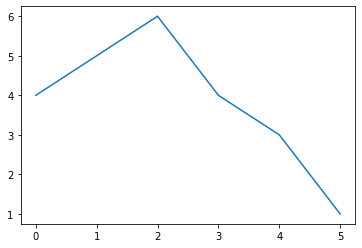

In [29]:
data = np.array([4, 5, 6, 4, 3, 1])
plt.plot(data)

## Vector Arithmetic

In Python when we add iterables together they are joined:

In [33]:
data = np.array([1, 2, 3])
ones = np.ones(data.size)
data + ones

array([2., 3., 4.])

`numpy` works differently - addition works **element wise**:

<img src="assets/add.png" alt="" width="300"/>

All of the logic above holds for subtraction, multiplication etc:

In [35]:
data ** 2

array([1, 4, 9])

In [36]:
data + np.array([[7, 8, 9]])

array([[ 8, 10, 12]])

In [42]:
data3 = np.array([[2], [4], [7], [9]])
data3

array([[2],
       [4],
       [7],
       [9]])

In [43]:
print(data)
print(data3)
data + data3

[1 2 3]
[[2]
 [4]
 [7]
 [9]]


array([[ 3,  4,  5],
       [ 5,  6,  7],
       [ 8,  9, 10],
       [10, 11, 12]])

In [ ]:
data2 = np.array([4, 5, 6, 7])
data2

Common problem to multiply every number of a list with a scalar represents way more work using lists compared to np arrays

Next to vector summing, of course it is also possible to take the product

In [45]:
lst = [2, 4, 6]
lst

[2, 4, 6]

In [48]:
[2*x for x in lst]

[4, 8, 12]

## Broadcasting

The smaller array will be broadcast across the larger array

<img src="assets/broad.png" alt="" width="300"/>

In [49]:
np.array([1, 2]) + np.array([[3],[4], [5]])

array([[4, 5],
       [5, 6],
       [6, 7]])

Note how different adding lists together is:

Broadcasting is important because the larger array **keep its shape**
- matrix multiplication (ie dot products) often result in differently shaped arrays

## Working in a single dimension

Vectors - flat lists

### Indexing

<img src="assets/idx.png" alt="" width="500"/>

### Aggregation

<img src="assets/agg.png" alt="" width="800"/>

## Practical 

Calculate the absolute difference between the sum of squared numbers between 1 and 100 and the square of their sum, once in pure python and with numpy arrays: 
$$ |(1^2 + 2^2 + 3^2 + ...) - (1 + 2 + 3 + ...)^2|$$ 


### Pure python:

In [62]:
n = 100
lst = list(range(1,n+1))
lst_square = [x**2 for x in lst]
result_square = 0
for x in lst_square:
    result_square += x
    
result_simple = 0
for x in lst:
    result_simple += x

result_simple *= result_simple    

result = np.abs(result_simple - result_square)

print(result_square)
print(result_simple)
print(result)

338350
25502500
25164150


### Numpy array

In [68]:
np_lst = np.arange(n + 1)
result = np.abs(np.sum(np_lst * np_lst) - np.sum(np_lst) ** 2)
result

25164150

## Answers:
You are encouraged to look at the solutions after you gave it a serious try 

## Making vectors

`np.arange` - similar to the Python builtin `range`

`np.linspace` - evenly spaced between two points

In [69]:
np.linspace(42, 180, 23)

array([ 42.        ,  48.27272727,  54.54545455,  60.81818182,
        67.09090909,  73.36363636,  79.63636364,  85.90909091,
        92.18181818,  98.45454545, 104.72727273, 111.        ,
       117.27272727, 123.54545455, 129.81818182, 136.09090909,
       142.36363636, 148.63636364, 154.90909091, 161.18181818,
       167.45454545, 173.72727273, 180.        ])

## Sampling random uniform

This can be done two ways
- `np.random.random`
- `np.random.rand`

Only difference is the shape argument is not a tuple
- saves writing the brackets

Sample uniformly across the interval [0, 1)

In [72]:
np.random.random((2,3))

array([[0.99435891, 0.67527657, 0.23702054],
       [0.270965  , 0.38509666, 0.28806566]])

In [79]:
np.random.rand(2,3,2,4)

array([[[[0.81406819, 0.11983087, 0.02652017, 0.93725285],
         [0.2521172 , 0.53626873, 0.79604148, 0.28121204]],

        [[0.64731964, 0.57413263, 0.08754835, 0.57022724],
         [0.52785146, 0.33114833, 0.89110079, 0.04105524]],

        [[0.11711268, 0.92521844, 0.48254175, 0.65802737],
         [0.11719759, 0.28785547, 0.00864916, 0.90713192]]],


       [[[0.05839803, 0.86463661, 0.76061286, 0.33114019],
         [0.33075839, 0.14960768, 0.5993249 , 0.8934288 ]],

        [[0.30647822, 0.55015849, 0.70727101, 0.69250738],
         [0.93161486, 0.4922647 , 0.78740665, 0.21757174]],

        [[0.94704897, 0.13831968, 0.3866113 , 0.34244918],
         [0.29982169, 0.13565243, 0.91549717, 0.71339486]]]])

## Sample from a standard normal

`np.random.randn`

$\mathcal{N}(0,1)$

In [80]:
np.random.randn(3)

array([-0.06280987,  0.49951804,  1.27422128])

## Sample from a Gaussian

`np.random.normal`

$\mathcal{N}(\mu,\sigma)$

We choose the statistics (mean & standard deviation)

In [81]:
np.random.normal(12, 0.1, (2,10))

array([[11.96379487, 11.88408121, 12.16637319, 12.21551007, 12.01613838,
        11.9571872 , 11.77858574, 12.10629245, 12.01884147, 12.03965448],
       [11.97065859, 11.95382423, 11.83511156, 12.12101631, 11.78344553,
        11.85613922, 12.04709406, 11.97816389, 11.93336917, 12.1092064 ]])

## Changing order of a numpy array
In case the order of the array is desired to be reversed, there are intuitive commands for that

In [83]:
ar1 = np.array([1, 2, 3, 4]).reshape(2,2)
print(ar1)
np.fliplr(ar1)

[[1 2]
 [3 4]]


array([[2, 1],
       [4, 3]])

# Practical: Finding the biggest product

In the 20×20 grid below, four numbers along a diagonal line have been marked in red.

<img src="assets/number.png" alt="" width="500"/>

The product of these numbers is 26 × 63 × 78 × 14 = 1788696.

What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the 20×20 grid?

### Potential approach
1. Getting the numbers in a workable format - (from string to integers, in a list, etc)
2. Writing a loop to extract a 4x4 matrix of the grid
3. Writing a function to calculate all potential products

In [84]:
num = ("""
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48""".replace("\n", " "))

In [118]:
lst = num.split(" ")
arr = np.array([int(x) for x in num.split(" ") if x != ""]).reshape((20, 20))
max_hor = {"coord": (-1, -1), "prod": 0}
max_vert = {"coord": (-1, -1), "prod": 0}
max_diag1 = {"coord": (-1, -1), "prod": 0}
max_diag2 = {"coord": (-1, -1), "prod": 0}
for row in range(20):
    for col in range(20):
        if col < 16:
            prod_hor = np.prod(arr[row, col : col + 4])
            if prod_hor > max_hor["prod"]:
                max_hor["coord"] = (row, col)
                max_hor["prod"] = prod_hor
        if row < 16:
            prod_vert = np.prod(arr[row : row + 4, col])
            if prod_vert > max_vert["prod"]:
                max_vert["coord"] = (row, col)
                max_vert["prod"] = prod_vert
        if (col < 16) and (row < 16):
            prod_diag1 = (
                arr[row, col]
                * arr[row + 1, col + 1]
                * arr[row + 2, col + 2]
                * arr[row + 3, col + 3]
            )
            if prod_diag1 > max_diag1["prod"]:
                max_diag1["coord"] = (row, col)
                max_diag1["prod"] = prod_diag1
        if (col >= 3) and (row < 16):
            prod_diag2 = (
                arr[row, col]
                * arr[row + 1, col - 1]
                * arr[row + 2, col - 2]
                * arr[row + 3, col - 3]
            )
            if prod_diag2 > max_diag2["prod"]:
                max_diag2["coord"] = (row, col)
                max_diag2["prod"] = prod_diag2

max(max_hor["prod"], max_vert["prod"], max_diag1["prod"], max_diag2["prod"])

{'coord': (8, 10), 'prod': 48477312}
{'coord': (6, 15), 'prod': 51267216}
{'coord': (2, 1), 'prod': 32719995}
{'coord': (12, 6), 'prod': 70600674}


70600674

In [121]:
[arr[0, 0], arr[1, 1], arr[2, 2], arr[3, 3]]

[8, 49, 31, 23]

In [127]:
coord = [(0, 0), (1, 1), (2, 2), (3, 3)]


In [129]:
[arr[r, r] for r in range(4)]

[8, 49, 31, 23]

## Answer:
Here you can check whether your results matches the solutions. You are encouraged to look at the code after you gave it a serious try